# Install 
Excute in PowerShell
```
rm -r dp500 -f
git clone https://github.com/MicrosoftLearning/DP-500-Azure-Data-Analyst dp500
```
 After the repo has been cloned, enter the following commands to change to the folder for this lab and run the setup.ps1 script it contains:
```
cd dp500/Allfiles/02
./setup.ps1
```

In [44]:
%%pyspark
 from pyspark.sql.types import *
 from pyspark.sql.functions import *

 orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
     ])

df = spark.read.load('abfss://files@datalakep5lerxv.dfs.core.windows.net/sales/orders/*.csv', 
format='csv',
 schema=orderSchema
)

display(df.limit(10))

StatementMeta(sparkp5lerxv, 0, 50, Finished, Available)

SynapseWidget(Synapse.DataFrame, 326389c5-3e99-407a-bcf4-0e9dd14bc085)

In [45]:
df.createOrReplaceTempView("sales_orders")

df.show(11)


StatementMeta(sparkp5lerxv, 0, 51, Finished, Available)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|         SO49171|                   1|2021-01-01| Mariah Foster|mariah21@adventur...|  Road-250 Black, 48|       1|2181.5625| 174.525|
|         SO49172|                   1|2021-01-01|  Brian Howard|brian23@adventure...|    Road-250 Red, 44|       1|  2443.35| 195.468|
|         SO49173|                   1|2021-01-01| Linda Alvarez|linda19@adventure...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49174|                   1|2021-01-01|Gina Hernandez|gina4@adventure-w...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49178|                   1|2021-01-0

In [46]:
%%sql
select distinct SalesOrderLineNumber, Quantity
from sales_orders

StatementMeta(sparkp5lerxv, 0, 52, Finished, Available)

<Spark SQL result set with 8 rows and 2 fields>

In [47]:
 df.printSchema()
 
 customers = df['CustomerName', 'Email']
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

StatementMeta(sparkp5lerxv, 0, 53, Finished, Available)

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)

32718
12427


SynapseWidget(Synapse.DataFrame, 4eeae627-aa97-4827-98c5-f8847d4fee48)

In [48]:
 customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

StatementMeta(sparkp5lerxv, 0, 54, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, 6c50f034-5890-4ebf-9e40-febc70594539)

In [49]:
 productSales = df.select("Item", "Quantity").groupBy("Item").sum()
 display(productSales)

StatementMeta(sparkp5lerxv, 0, 55, Finished, Available)

SynapseWidget(Synapse.DataFrame, e439ac1e-f331-48c5-9684-99a141035c46)

In [50]:
 yearlySales = df.select(year("OrderDate").alias("Year")).groupBy("Year").count().orderBy("Year")
 display(yearlySales)

StatementMeta(sparkp5lerxv, 0, 56, Finished, Available)

SynapseWidget(Synapse.DataFrame, 09efa37f-3e63-408b-8ed5-49e0fe8196a1)

In [51]:
 df.createOrReplaceTempView("salesorders")

 spark_df = spark.sql("SELECT * FROM salesorders")
 display(spark_df)

StatementMeta(sparkp5lerxv, 0, 57, Finished, Available)

SynapseWidget(Synapse.DataFrame, 4aa9ee7a-e7e5-4ea4-a446-f777c3890808)

In [52]:
 %%sql
 SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
 FROM salesorders
 GROUP BY YEAR(OrderDate)
 ORDER BY OrderYear;

StatementMeta(sparkp5lerxv, 0, 58, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

In [53]:
 %%sql
 SELECT * FROM salesorders

StatementMeta(sparkp5lerxv, 0, 59, Finished, Available)

<Spark SQL result set with 1000 rows and 9 fields>

In [54]:
 sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                 SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
             FROM salesorders \
             GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
             ORDER BY OrderYear"
 df_spark = spark.sql(sqlQuery)
 df_spark.show()

StatementMeta(sparkp5lerxv, 0, 60, Finished, Available)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(sparkp5lerxv, 0, 61, Finished, Available)

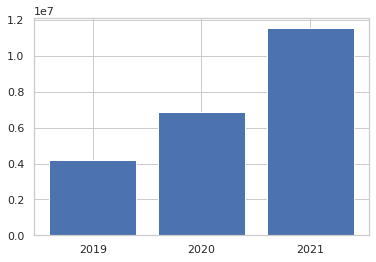

In [55]:
 from matplotlib import pyplot as plt

 # matplotlib requires a Pandas dataframe, not a Spark one
 df_sales = df_spark.toPandas()

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

 # Display the plot
 plt.show()

StatementMeta(sparkp5lerxv, 0, 62, Finished, Available)

<Figure size 432x288 with 0 Axes>

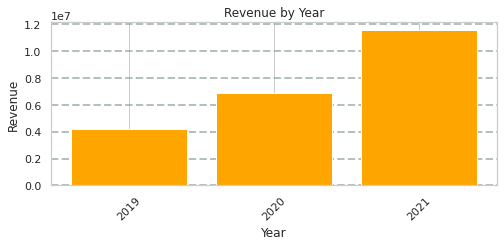

In [56]:
 from matplotlib import pyplot as plt

 # matplotlib requires a Pandas dataframe, not a Spark one
 df_sales = df_spark.toPandas()
 # Clear the plot area
 plt.clf()

 # Create a Figure
 fig = plt.figure(figsize=(8,3))

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

 # Customize the chart
 plt.title('Revenue by Year')
 plt.xlabel('Year')
 plt.ylabel('Revenue')
 plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
 plt.xticks(rotation=45)

 # Show the figure
 plt.show()

StatementMeta(sparkp5lerxv, 0, 63, Finished, Available)

<Figure size 432x288 with 0 Axes>

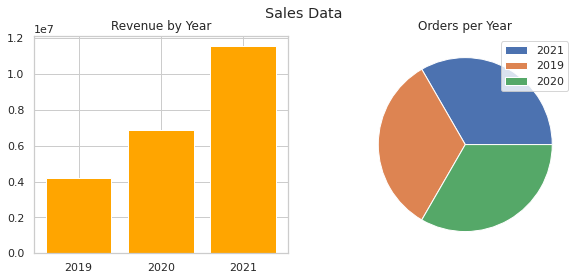

In [57]:
 # Clear the plot area
 plt.clf()

 # Create a figure for 2 subplots (1 row, 2 columns)
 fig, ax = plt.subplots(1, 2, figsize = (10,4))

 # Create a bar plot of revenue by year on the first axis
 ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
 ax[0].set_title('Revenue by Year')

 # Create a pie chart of yearly order counts on the second axis
 yearly_counts = df_sales['OrderYear'].value_counts()
 ax[1].pie(yearly_counts)
 ax[1].set_title('Orders per Year')
 ax[1].legend(yearly_counts.keys().tolist())

 # Add a title to the Figure
 fig.suptitle('Sales Data')

 # Show the figure
 plt.show()

StatementMeta(sparkp5lerxv, 0, 64, Finished, Available)

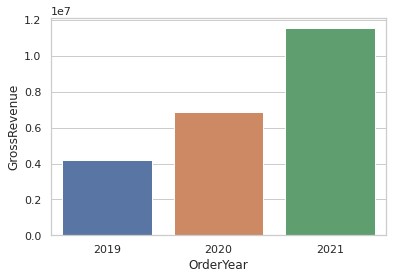

In [58]:
 import seaborn as sns

 # Clear the plot area
 plt.clf()

 # Create a bar chart
 ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()

StatementMeta(sparkp5lerxv, 0, 65, Finished, Available)

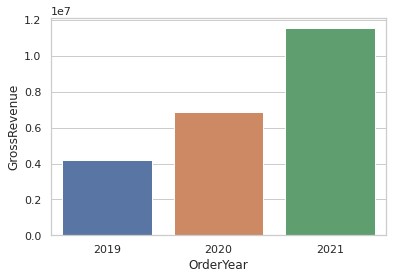

In [59]:
 # Clear the plot area
 plt.clf()

 # Set the visual theme for seaborn
 sns.set_theme(style="whitegrid")

 # Create a bar chart
 ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()

StatementMeta(sparkp5lerxv, 0, 66, Finished, Available)

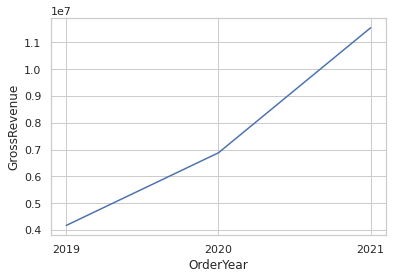

In [60]:
 # Clear the plot area
 plt.clf()

 # Create a bar chart
 ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
 plt.show()